In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
import scipy.stats

datavel=pd.read_pickle(r'Datavel_int.pickle')

In [3]:
fads_vel=np.hstack(datavel['velocidad'])
ustk=np.hstack(datavel['ustk_int'])
vstk=np.hstack(datavel['vstk_int'])

utotal=np.hstack(datavel['utotal_int'])
vtotal=np.hstack(datavel['vtotal_int'])

bio=np.hstack(datavel['bio'])[0:-1]


In [4]:
Vstk=np.sqrt(ustk**2+vstk**2)
Vtotal=np.sqrt(utotal**2+vtotal**2)

diff_stk=Vstk-fads_vel
bio_stk=bio[~np.isnan(diff_stk)]
diff_stk= diff_stk[~np.isnan(diff_stk)]

diff_total=Vtotal-fads_vel
bio_total=bio[~np.isnan(diff_total)]
diff_total= diff_total[~np.isnan(diff_total)]

diff_total_bio=diff_total[np.where(pd.DataFrame(bio_total)[0].str.contains('BIO'))[0]]
diff_stk_bio=diff_stk[np.where(pd.DataFrame(bio_stk)[0].str.contains('BIO'))[0]]

diff_total_con=diff_total[np.where(pd.DataFrame(bio_total)[0].str.contains('CON'))[0]]
diff_stk_con=diff_stk[np.where(pd.DataFrame(bio_stk)[0].str.contains('CON'))[0]]

Text(0.5, 1.0, 'Diff V_total total')

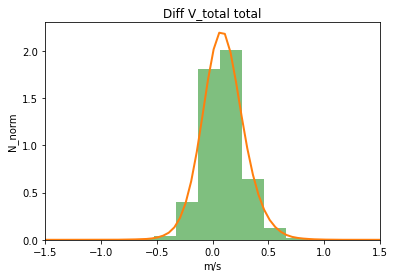

In [5]:

kde = scipy.stats.gaussian_kde(diff_total,bw_method=None) 


# plot (normalized) histogram of the data

plt.hist(diff_total, bins=300, density=True, facecolor='green', alpha=0.5);

t_range = np.linspace(-2,8,200)
plt.plot(t_range,kde(t_range),lw=2)
plt.xlim(-1,6)
#plt.legend(loc='best')

plt.xlim(-1.5,1.5)
plt.xlabel('m/s')
plt.ylabel('N_norm')
plt.title('Diff V_total total')
#plt.savefig('Diff_total_total.png', dpi=300)

Text(0.5, 1.0, 'Diff V_skokes')

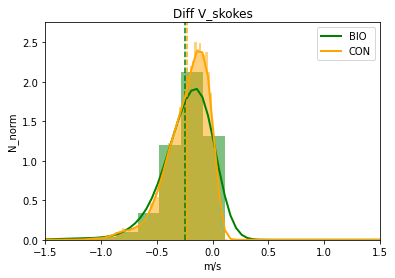

In [39]:
kde = scipy.stats.gaussian_kde(diff_stk_bio,bw_method=None) 
plt.hist(diff_stk_bio, bins=300, density=True, facecolor='green', alpha=0.5);
plt.plot(t_range,kde(t_range),lw=2,color='green',label='BIO')

mean=np.nanmean(diff_stk_bio)
plt.plot([mean,mean],[0,3],'--',color='green')


kde = scipy.stats.gaussian_kde(diff_stk_con,bw_method=None)
plt.hist(diff_stk_con, bins=300, density=True, facecolor='orange', alpha=0.5);
plt.plot(t_range,kde(t_range),lw=2,color='orange',label='CON')

mean=np.nanmean(diff_stk_con)
plt.plot([mean,mean],[0,3],'--',color='orange')


plt.legend(loc='best')
plt.ylim(0,2.75)
plt.xlim(-1.5,1.5)
plt.xlabel('m/s')
plt.ylabel('N_norm')
plt.title('Diff V_skokes')
#plt.savefig('Diff_stokes.png', dpi=300)

Text(0.5, 1.0, 'Diff V_total')

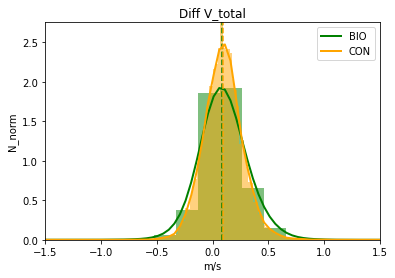

In [40]:
kde = scipy.stats.gaussian_kde(diff_total_bio,bw_method=None) 
plt.hist(diff_total_bio, bins=300, density=True, facecolor='green', alpha=0.5);
plt.plot(t_range,kde(t_range),lw=2,color='green',label='BIO')

mean=np.nanmean(diff_total_bio)
plt.plot([mean,mean],[0,3],'--',color='green')

kde = scipy.stats.gaussian_kde(diff_total_con,bw_method=None)
plt.hist(diff_total_con, bins=300, density=True, facecolor='orange', alpha=0.5);
plt.plot(t_range,kde(t_range),lw=2,color='orange',label='CON')

mean=np.nanmean(diff_total_con)
plt.plot([mean,mean],[0,3],'--',color='orange')



plt.legend(loc='best')
plt.xlim(-1.5,1.5)
plt.ylim(0,2.75)
plt.xlabel('m/s')
plt.ylabel('N_norm')
plt.title('Diff V_total')
#plt.savefig('Diff_total.png', dpi=300)